<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Analyze and Visualize Sentiment Patterns in Social Patterns in Social Media data to Understand Public Opinion and Attitude towards Specific topic or Brand.</strong></h1>
</div>

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Import Necessary Libraries</strong></h1>
</div>

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix , classification_report ,accuracy_score,ConfusionMatrixDisplay

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong> Importing the Dataset of Twitter</strong></h1>
</div>


In [3]:
name_column = ['id', 'entity', 'target', 'Tweet content']
file_path = r"F:\Experiences\01-Prodigy InfoTech-DS-Internship\Data Sets\Task-04-Sentiment-Patterns-In-Social Media Data/twitter_training.csv"
df = pd.read_csv(file_path, names=name_column)

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Explore the Basics of The Dataset</strong></h1>
</div>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             74682 non-null  int64 
 1   entity         74682 non-null  object
 2   target         74682 non-null  object
 3   Tweet content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Cleaning Dataset</strong></h1>
</div>

In [5]:
columns_to_drop = ['id', 'entity']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1)
df

,target,Tweet content
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
74677,Positive,Just realized that the Windows partition of my...
74678,Positive,Just realized that my Mac window partition is ...
74679,Positive,Just realized the windows partition of my Mac ...
74680,Positive,Just realized between the windows partition of...


In [6]:
df.isnull().sum()

target             0
Tweet content    686
dtype: int64

In [7]:
row, col =df.shape
print(f'Number of rows in Dataset: {row} and Number of Columns: {col}' )

Number of rows in Dataset: 74682 and Number of Columns: 2


In [8]:
df.head()

,target,Tweet content
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [9]:
df.sample(5)

,target,Tweet content
8954,Positive,Overwatch literally changed my life. Not only ...
40490,Irrelevant,Ban for Battlefield 4 player DarkSouls-04 has ...
31218,Irrelevant,GG und fucking well played!
52116,Negative,If I didn’t set my fan to 100% speed Red Dead ...
47454,Negative,"In other news, idiots have raided Home Depot o..."


In [10]:
df.dropna(inplace=True)

In [11]:
count=df['target'].value_counts()
count

target
Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

C:\Users\Muhammad Adeel\AppData\Local\Temp\ipykernel_9536\2104514500.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index,y=count.values,palette='viridis')


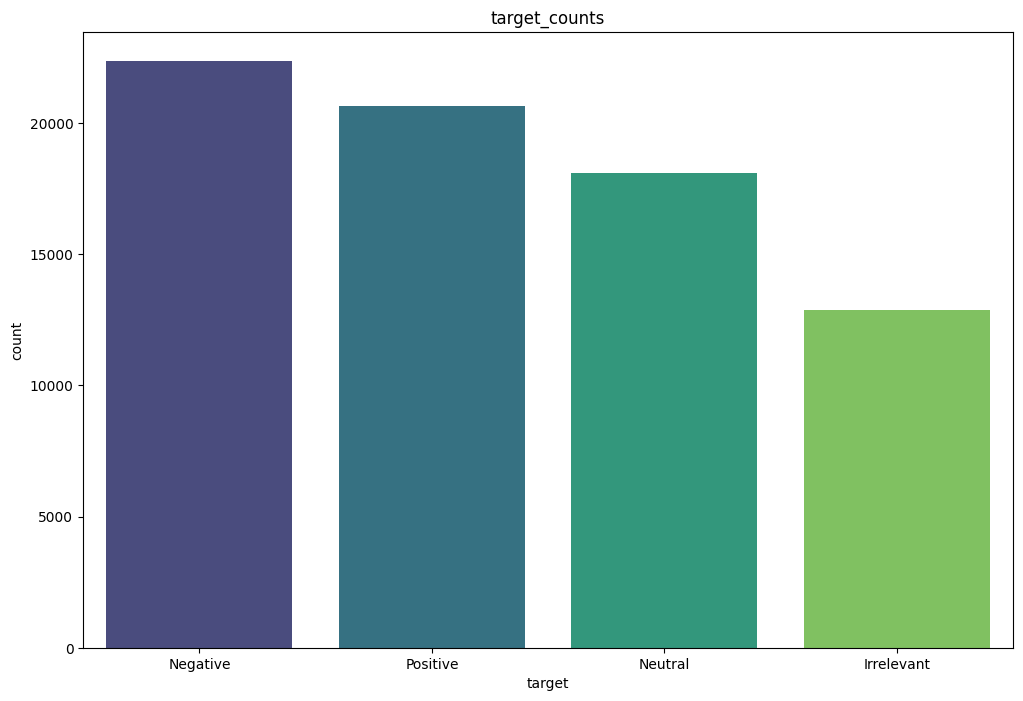

In [13]:
plt.figure(figsize=(12,8))
sns.barplot(x=count.index,y=count.values,palette='viridis')
plt.title('target_counts')
plt.xlabel('target')
plt.ylabel('count')
plt.show()

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Data Preprocessing</strong></h1>
</div>

In [14]:
ps=PorterStemmer()
stops=set(stopwords.words('english'))
def preprocessing_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '',text)
    text=text.lower()
    token=text.split()
    token=[ps.stem(word) for word in token if word not in stops]
    return ' '.join(token)

In [15]:
df['Tweet content']=df['Tweet content'].apply(preprocessing_text)
df['Tweet content']

0                                 im get borderland murder
1                                         come border kill
2                                   im get borderland kill
3                                im come borderland murder
4                                 im get borderland murder
                               ...                        
74677    realiz window partit mac like year behind nvid...
74678    realiz mac window partit year behind nvidia dr...
74679    realiz window partit mac year behind nvidia dr...
74680    realiz window partit mac like year behind nvid...
74681    like window partit mac like year behind driver...
Name: Tweet content, Length: 73996, dtype: object

In [16]:
tf=TfidfVectorizer(max_features=5000)
x=tf.fit_transform(df['Tweet content'])
y=df['target']

In [17]:
x.shape

(73996, 5000)

### Split the Dataset Into Training and Testing 

In [24]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Apply Naive Bayes , Decision Tree, Random Classification Models on the Dataset</strong></h1>
</div>


--- Naive Bayes ---

Accuracy: 0.6324324324324324

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.74      0.34      0.47      2696
    Negative       0.61      0.81      0.70      4380
     Neutral       0.67      0.51      0.58      3605
    Positive       0.61      0.74      0.67      4119

    accuracy                           0.63     14800
   macro avg       0.66      0.60      0.60     14800
weighted avg       0.65      0.63      0.62     14800


Confusion Matrix:
 [[ 924  728  300  744]
 [  78 3532  309  461]
 [ 147  836 1843  779]
 [  97  652  309 3061]]

--- Decision tree ---

Accuracy: 0.7733783783783784

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.77      0.68      0.72      2696
    Negative       0.82      0.81      0.81      4380
     Neutral       0.71      0.79      0.75      3605
    Positive       0.80      0.78      0.79      4119

    accuracy              

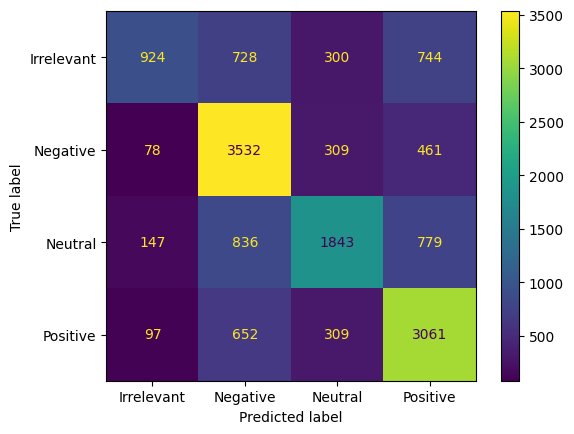

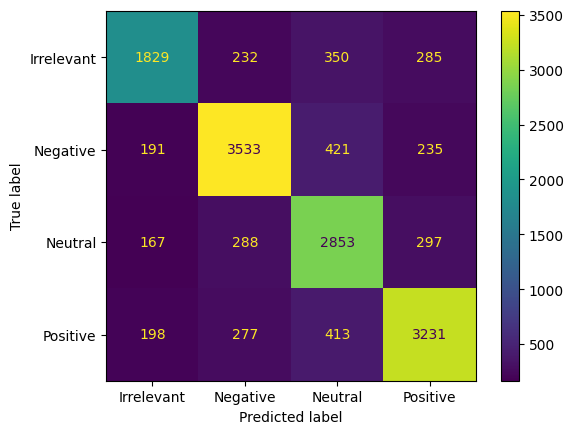

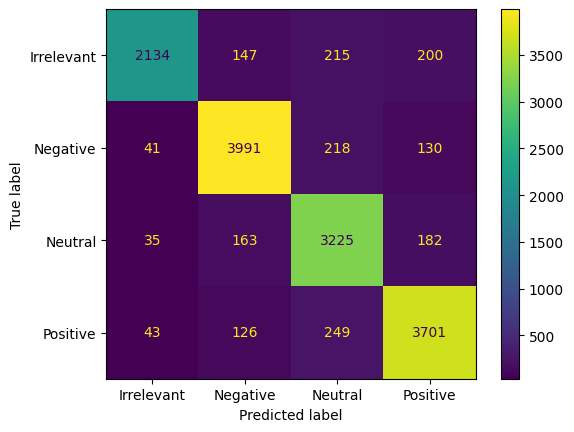

In [26]:
models = {
    'Naive Bayes': MultinomialNB(),
    'Decision tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n--- {name} ---\n")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong> Visualizing the Most Frequent Words by Sentiment</strong></h1>
</div>

['positive' 'neutral' 'negative' 'irrelevant']


C:\Users\Muhammad Adeel\AppData\Local\Temp\ipykernel_9536\1469965463.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word[1] for word in common_words], y=[word[0] for word in common_words], palette='viridis')


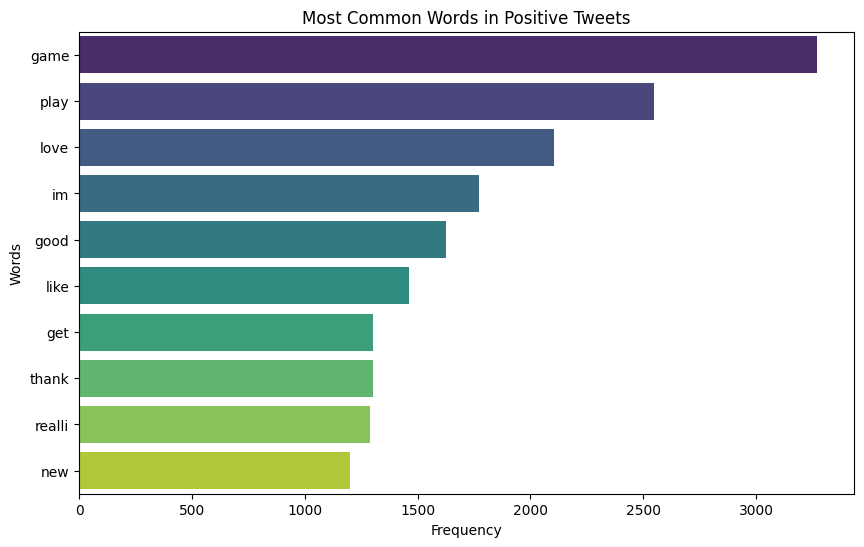

C:\Users\Muhammad Adeel\AppData\Local\Temp\ipykernel_9536\1469965463.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word[1] for word in common_words], y=[word[0] for word in common_words], palette='viridis')


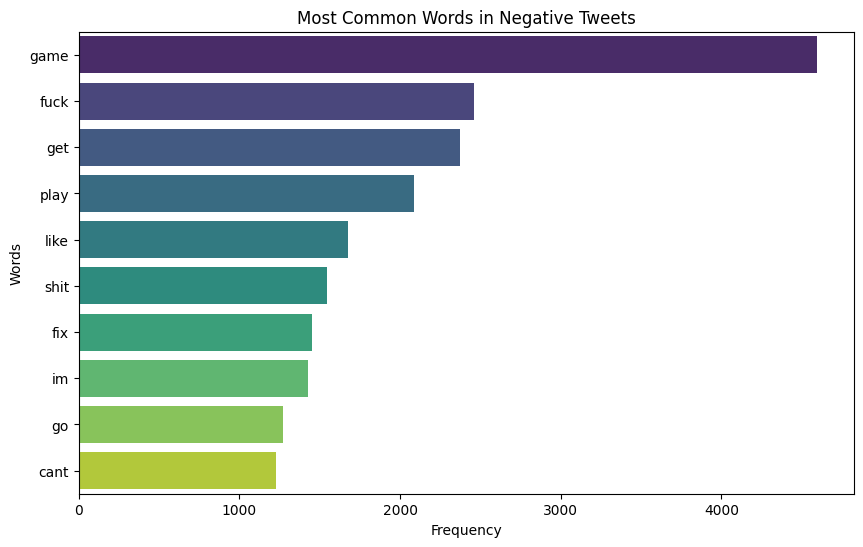

C:\Users\Muhammad Adeel\AppData\Local\Temp\ipykernel_9536\1469965463.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word[1] for word in common_words], y=[word[0] for word in common_words], palette='viridis')


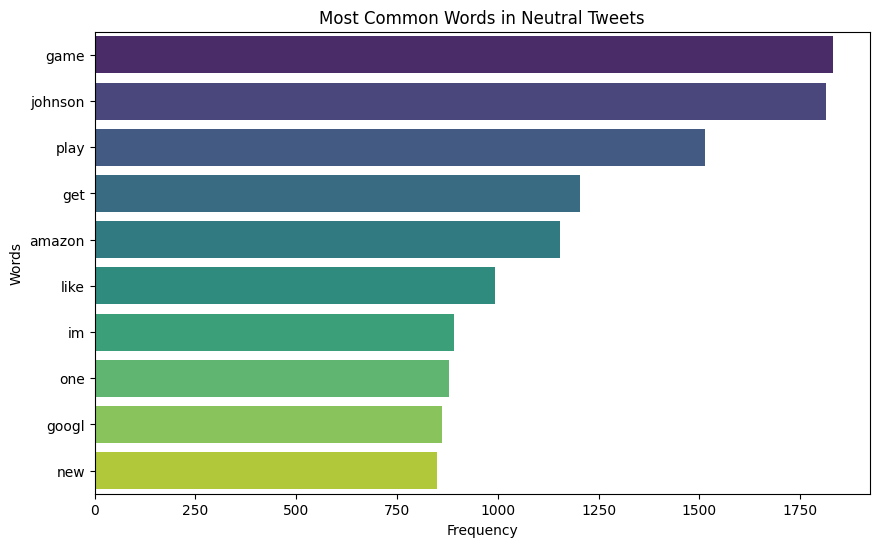

In [35]:
# Check unique values in the target column
print(df['target'].unique())
# Normalize the sentiment values by stripping spaces and converting to lowercase
df['target'] = df['target'].str.strip().str.lower()
# Plot most common words for different sentiments
plot_most_common_words(df, 'positive')
plot_most_common_words(df, 'negative')
plot_most_common_words(df, 'neutral')


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Topic Modeling (Optional)</strong></h1>
</div>

In [30]:
from sklearn.decomposition import LatentDirichletAllocation

# Perform LDA on the tweets
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(x)

# Display the top words in each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

tf_feature_names = tf.get_feature_names_out()
display_topics(lda, tf_feature_names, 10)


Topic 0:
johnson dead red redempt thank beauti wait cant babi like
Topic 1:
game unk wow play player good battlefield see best ban
Topic 2:
fuck rhandlerr game look im video watch play wtf go
Topic 3:
shit nbak game home fuck verizon depot get im black
Topic 4:
game love play get like fifa rainbowgam call im fuck


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Word Cloud for Each Sentiment</strong></h1>
</div>

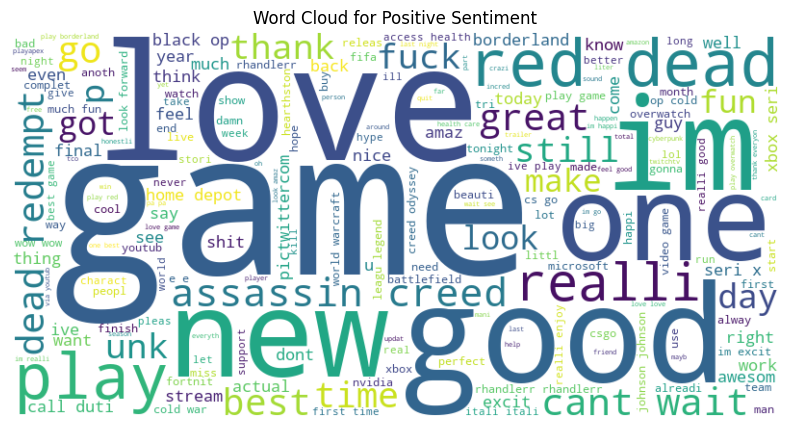

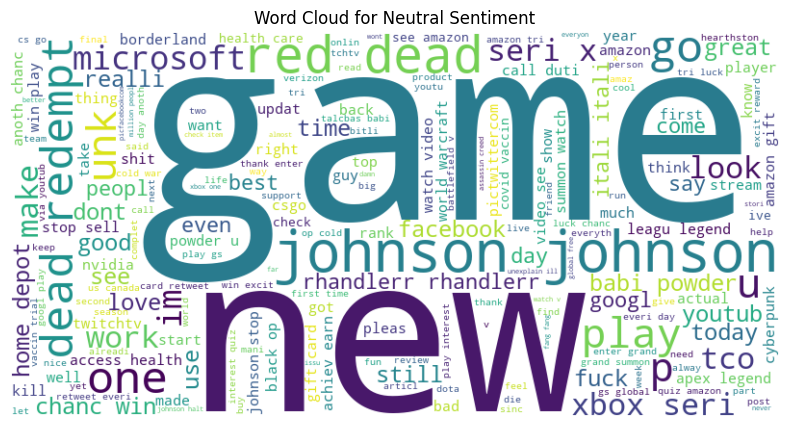

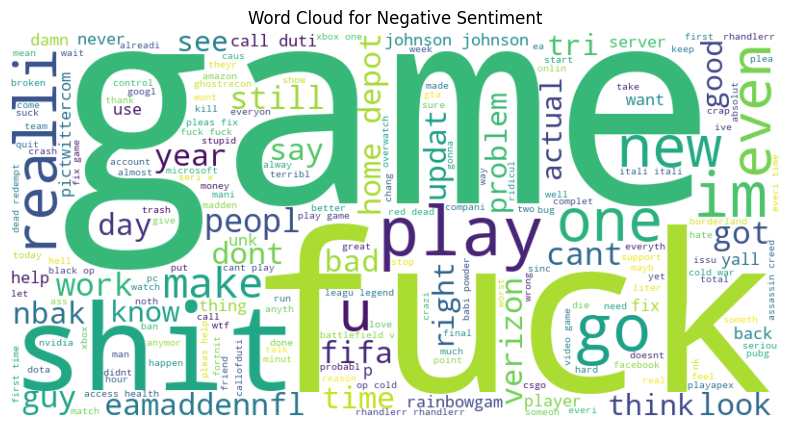

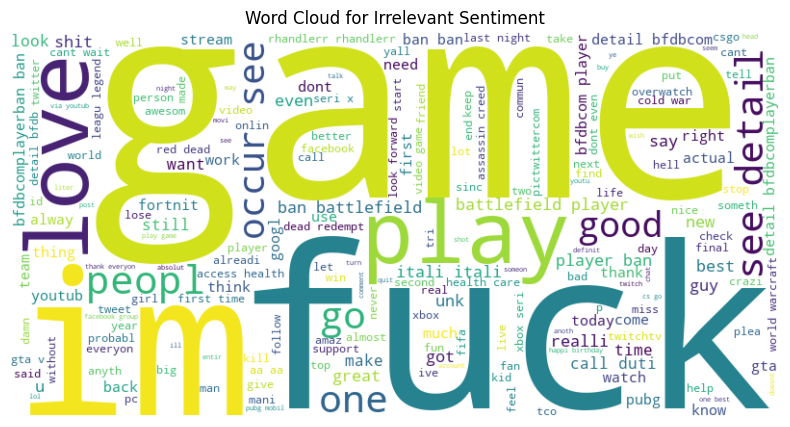

In [31]:
# Create Word Clouds for each sentiment
for sentiment in df['target'].unique():
    sentiment_text = " ".join(df[df['target'] == sentiment]['Tweet content'].astype(str).tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentiment_text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Sentiment')
    plt.axis('off')
    plt.show()


C:\Users\Muhammad Adeel\AppData\Local\Temp\ipykernel_9536\3481398489.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_sentiment_counts.index, y=brand_sentiment_counts.values, palette='viridis')


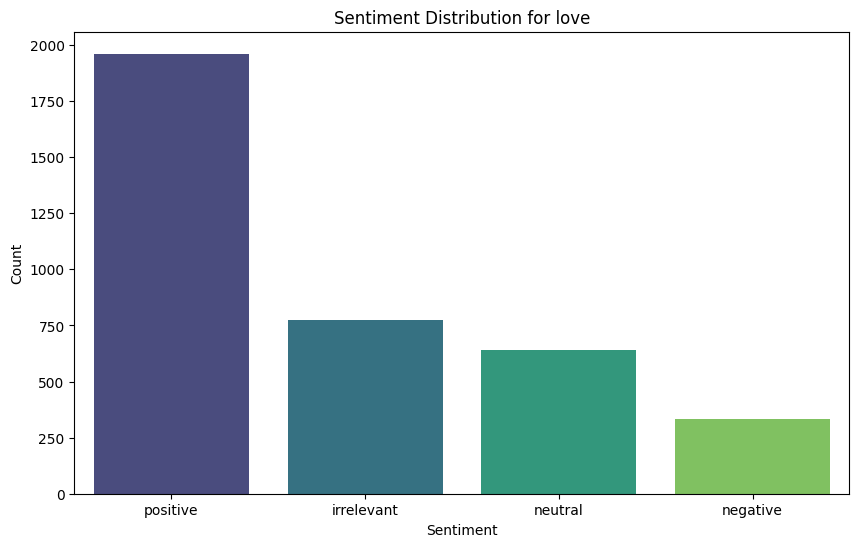

In [41]:
# Example: Analyzing sentiment towards a specific brand
brand_name = 'love'  # Replace with the entity or brand name you're interested in
brand_df = df[df['Tweet content'].str.contains(brand_name, case=False, na=False)]

# Re-run the sentiment analysis on this filtered data
brand_sentiment_counts = brand_df['target'].value_counts()

# Visualize sentiment distribution for the brand
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_sentiment_counts.index, y=brand_sentiment_counts.values, palette='viridis')
plt.title(f'Sentiment Distribution for {brand_name}')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Sentiment Correlation with Tweet Features</strong></h1>
</div>

C:\Users\Muhammad Adeel\AppData\Local\Temp\ipykernel_9536\1152209091.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='tweet_length', data=df, palette='viridis')


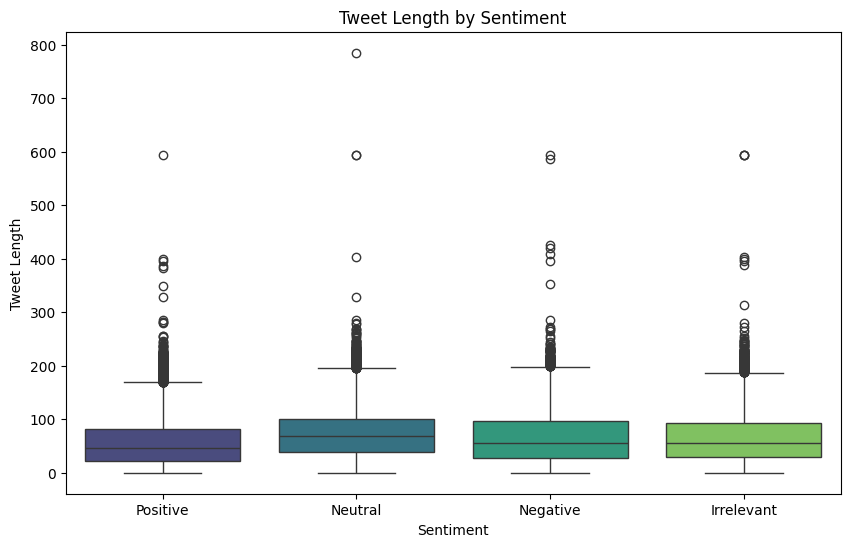

In [32]:
# Example: Correlation between sentiment and tweet length
df['tweet_length'] = df['Tweet content'].apply(len)

plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='tweet_length', data=df, palette='viridis')
plt.title('Tweet Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length')
plt.show()


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Study Conclusion</strong></h1>
</div>

<div style="text-align: center;">
    <h3 style="font-size: 36px;">In this study, we analyzed sentiment patterns in Twitter data to understand public opinion toward specific topics. By applying machine learning models like Naive Bayes, Decision Trees, and Random Forests, we achieved effective sentiment classification.

We also explored the relationship between tweet length and sentiment, finding interesting correlations. This analysis provides valuable insights into how sentiment is expressed on social media, which can be useful for brands to gauge public opinion.</h3>
</div>

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>The End</strong></h1>
</div>

<!-- 
#MuhammadAdeel 
#DataScientist 
#DataScienceEnthusiast 
#MPhilDataScience 
#Python 
#DataAnalysis 
#MachineLearning 
#Multan 
#Pakistan 
#GitHub 
#LinkedIn
#EDA
#cirrhossis
#datacleaning
-->